In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img1 = cv2.imread('raja-ampat-indonesia.jpg')

In [3]:
img1.shape

(753, 1440, 3)

In [4]:
img2 = cv2.rectangle(img1,(600,300),(800,500),(255,255,0),-1)

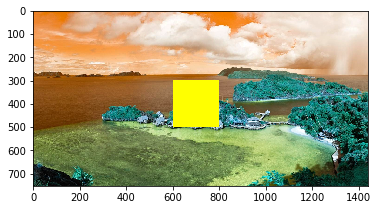

In [5]:
plt.imshow(img2)

In [9]:
x_global=0
y_global=0

def nothing(x):
    pass

def display_text(x,y):
    imgtext = img2.copy()
    font = cv2.FONT_HERSHEY_SIMPLEX
    r = img2[y,x,2]
    g = img2[y,x,1]
    b = img2[y,x,0]
    
    inputText = "Mouse position : " + str(x) + "," + str(y) + "; Color : (" + str(r) + "," + str(g) + "," + str(b) + ")"
    cv2.putText(imgtext, inputText, (50,60), font, 1, (255,0,0),3)
    cv2.imshow('image', imgtext)
    
def mouse(event, x,y, flags,params):
    global x_global
    global y_global
    
    x_global = x
    y_global = y
    
    # checking for left mouse clicks 
    if event == cv2.EVENT_MOUSEMOVE:
        display_text(x_global,y_global)

In [10]:
cv2.namedWindow('image')
cv2.createTrackbar('value','image',0,255,nothing)

while(1):
    cv2.imshow('image',img2)
    cv2.setMouseCallback('image', mouse)
    display_text(x_global, y_global)
    
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    # get current positions of four trackbars
    value = cv2.getTrackbarPos('value','image')
    img2 = cv2.rectangle(img1,(600,300),(800,500),(255,255,value),-1)
cv2.destroyAllWindows()